In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
matplotlib.rcParams.update({'font.size': 14})

In [6]:
PREPARED_DATASET_PATH = 'data/housing_prepared.csv'
CALIFORNIA_MAP_PATH = 'California_map.png'

In [7]:
df = pd.read_csv(PREPARED_DATASET_PATH)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,bedroom_share,population_per_room,-,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,14.659091,0.365909,0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1,15.579659,0.338217,0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2,12.951602,0.338105,0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3,18.445840,0.437991,0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4,17.209588,0.347265,0,0,0,0,1,0


In [8]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,bedroom_share,population_per_room,-,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,14.659091,0.365909,0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1,15.579659,0.338217,0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2,12.951602,0.338105,0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3,18.445840,0.437991,0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4,17.209588,0.347265,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,20635,22.462462,0.507508,0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,20636,21.520803,0.510760,0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1165.0,433.0,1.7000,92300.0,INLAND,20637,21.517303,0.516859,0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,20638,21.989247,0.398387,0,0,1,0,0,0


In [9]:
df.isnull().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms         0
population             0
households             0
median_income          0
median_house_value     0
ocean_proximity        0
id                     0
bedroom_share          0
population_per_room    0
-                      0
<1H OCEAN              0
INLAND                 0
ISLAND                 0
NEAR BAY               0
NEAR OCEAN             0
dtype: int64

In [10]:
df.dtypes

longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity         object
id                       int64
bedroom_share          float64
population_per_room    float64
-                        int64
<1H OCEAN                int64
INLAND                   int64
ISLAND                   int64
NEAR BAY                 int64
NEAR OCEAN               int64
dtype: object

In [38]:
# Есть float32 и float16 чтобы уменьшить использованную память
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        if (col_type != object) and (str(col_type) != 'category'):
            c_min = df[col].min()
            c_max = df[col].max()
            
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        elif col_type == object:
            df[col] = df[col].astype('category')
    
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [39]:
df = reduce_mem_usage(df)

Memory usage of dataframe is 1.04 MB
Memory usage after optimization is: 1.04 MB
Decreased by 0.0%


In [40]:
df.dtypes

longitude               float32
latitude                float32
housing_median_age      float32
total_rooms             float32
total_bedrooms          float32
population              float32
households              float32
median_income           float32
median_house_value      float32
ocean_proximity        category
id                        int16
bedroom_share           float32
population_per_room     float32
-                          int8
<1H OCEAN                  int8
INLAND                     int8
ISLAND                     int8
NEAR BAY                   int8
NEAR OCEAN                 int8
dtype: object

In [41]:
# Распределение целевой переменной

In [42]:
# Помните про различие срднего, медианы, моды
# Среднее подходят для нормальных распределений
# Медиана - практически для любых распределений
# Мода - для категориальных переменных
# Пока не рассматриваем зависимость целевой переменной от фичей

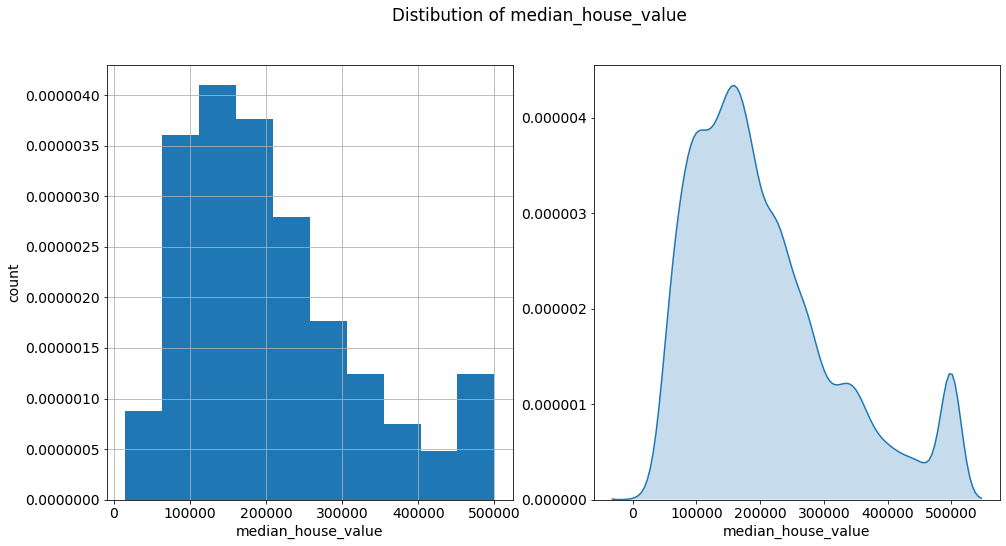

In [49]:
plt.figure(figsize = (16, 8))
plt.subplot(121)
df['median_house_value'].hist(density=True) # shift + Tab - справка по функции 
#density = false - все возможные признаки разделяются на бины
# density = true - все это делится на количество наблюдений
plt.ylabel('count')
plt.xlabel('median_house_value')

plt.subplot(122)
sns.kdeplot(df['median_house_value'], shade=True, legend=False)
plt.xlabel('median_house_value')
plt.suptitle('Distibution of median_house_value')
plt.show()

In [51]:
target_mean = round(df['median_house_value'].mean(), 2)
target_median = df['median_house_value'].median()
target_mode = df['median_house_value'].mode()[0]

In [53]:
target_mean

206854.97

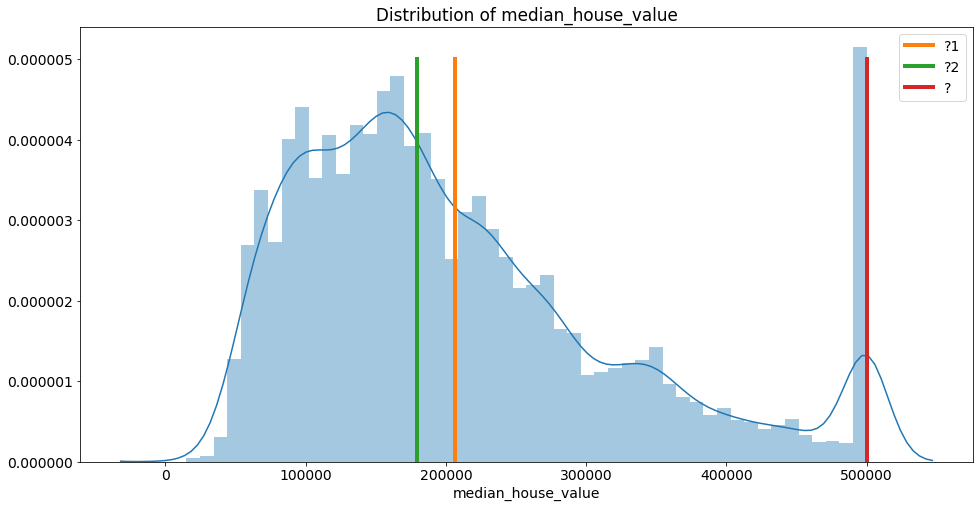

In [54]:
plt.figure(figsize = (16, 8))
sns.distplot(df['median_house_value'], bins=50)

y = np.linspace(0, 0.000005, 100)
plt.plot([target_mean] * 100, y, label='?1', linewidth=4)
plt.plot([target_median] * 100, y, label='?2', linewidth=4)
plt.plot([target_mode] * 100, y, label='?', linewidth=4)

plt.title('Distribution of median_house_value')
plt.legend()
plt.show()

In [56]:
# Не хорошо считать моду для количественного признака
# но можно из количественного сделать категориальный признак
target_bins = df['median_house_value'] // 10000 * 10000
target_adjusted_mode = target_bins.mode()[0]
target_adjusted_mode

160000.0

In [57]:
np.unique(target_bins)

array([ 10000.,  20000.,  30000.,  40000.,  50000.,  60000.,  70000.,
        80000.,  90000., 100000., 110000., 120000., 130000., 140000.,
       150000., 160000., 170000., 180000., 190000., 200000., 210000.,
       220000., 230000., 240000., 250000., 260000., 270000., 280000.,
       290000., 300000., 310000., 320000., 330000., 340000., 350000.,
       360000., 370000., 380000., 390000., 400000., 410000., 420000.,
       430000., 440000., 450000., 460000., 470000., 480000., 490000.,
       500000.], dtype=float32)

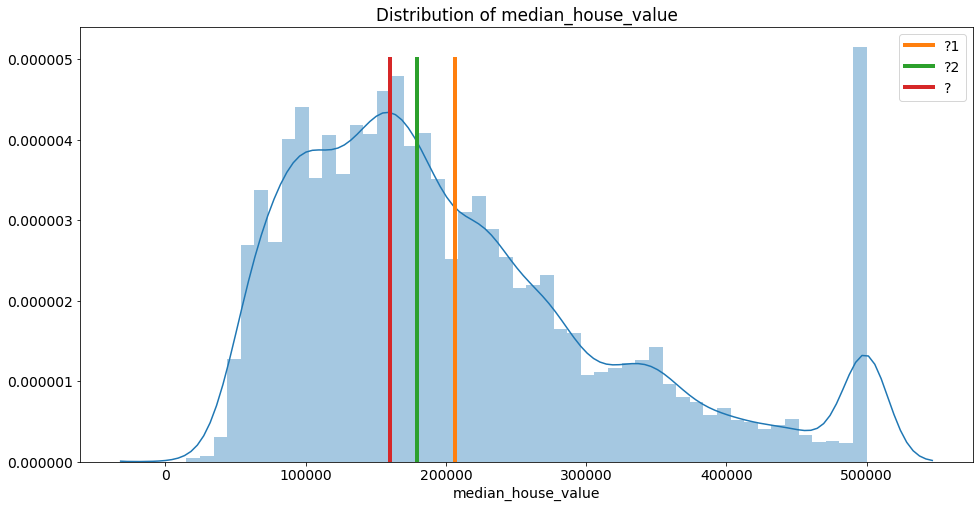

In [58]:
plt.figure(figsize = (16, 8))
sns.distplot(df['median_house_value'], bins=50)

y = np.linspace(0, 0.000005, 100)
plt.plot([target_mean] * 100, y, label='?1', linewidth=4)
plt.plot([target_median] * 100, y, label='?2', linewidth=4)
plt.plot([target_adjusted_mode] * 100, y, label='?', linewidth=4)

plt.title('Distribution of median_house_value')
plt.legend()
plt.show()

In [59]:
# анализ признаков
# Пока не рассматриваем их влияние на таргет


In [61]:
# Количественные признаки
# выбираем признакти с данными типами
df_num_features = df.select_dtypes(include=['float64', 'float32'])
df_num_features.drop('median_house_value', axis=1, inplace=True)

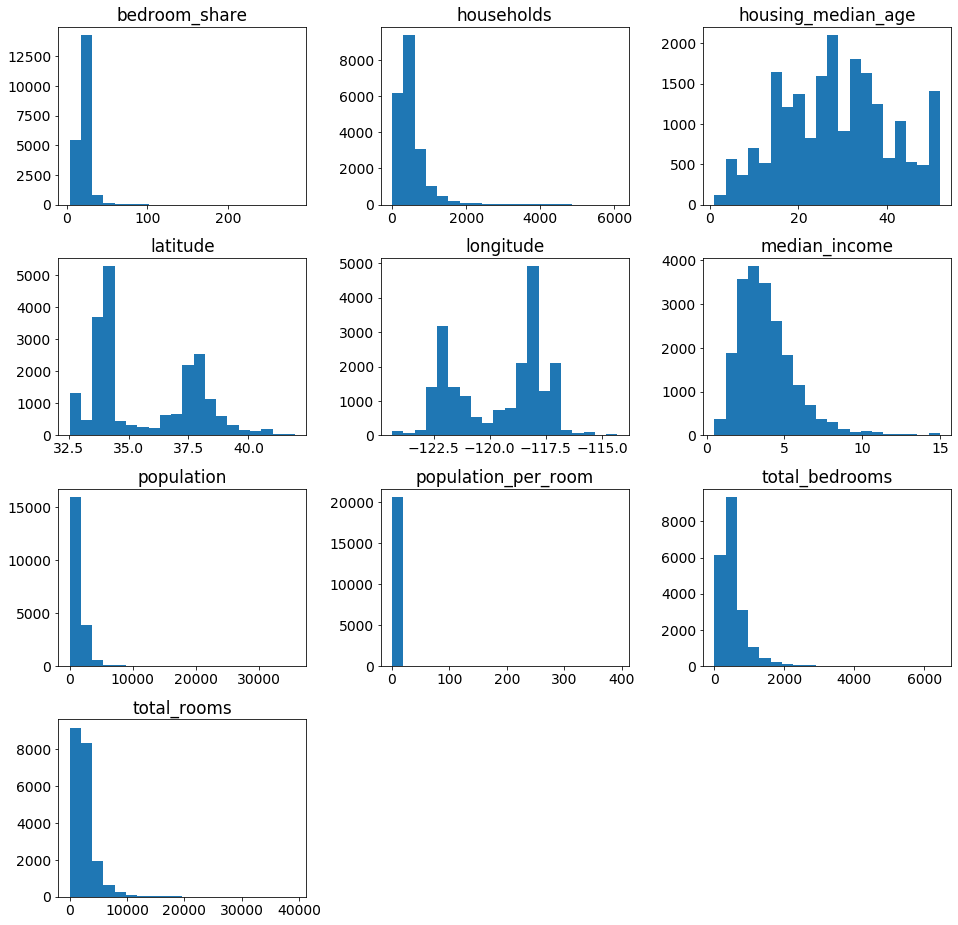

In [62]:
df_num_features.hist(figsize=(16, 16), bins=20, grid=False);

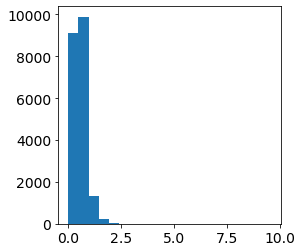

In [63]:
df_num_features.loc[df_num_features['population_per_room'] < 10, 'population_per_room'].\
    hist(figsize=(4,4), bins=20, grid=False)

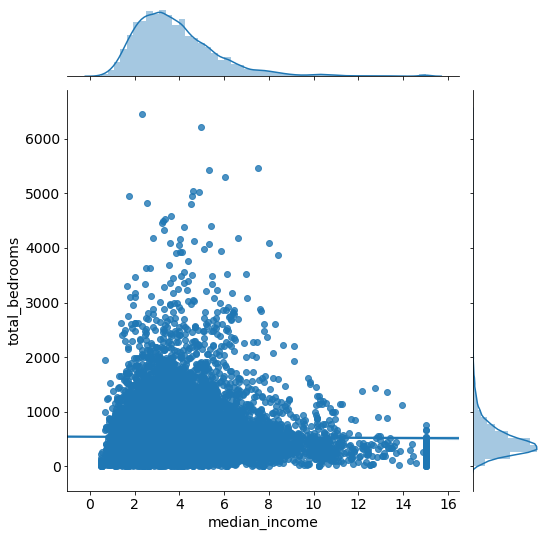

In [66]:
# диаграмма рассеивания
grid = sns.jointplot(df['median_income'], df['total_bedrooms'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)
plt.show()

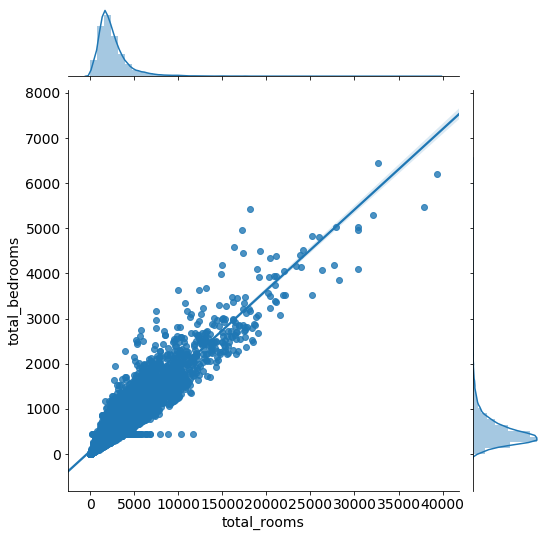

In [67]:
grid = sns.jointplot(df['total_rooms'], df['total_bedrooms'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)
plt.show()

In [68]:
df.shape

(20640, 19)

In [69]:
df[df['total_bedrooms'] == df['total_bedrooms'].median()].shape[0]

244

In [73]:
df[df['total_bedrooms'] == 435].shape[0]

244

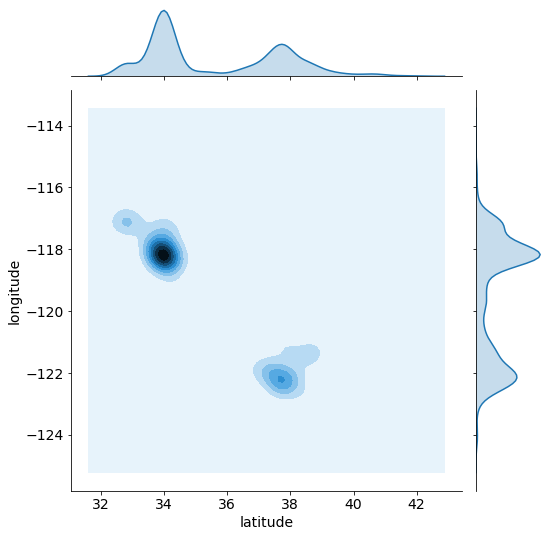

In [70]:
grid = sns.jointplot(df['latitude'], df['longitude'], kind='kde')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

In [74]:
df['city'] = (df['longitude'] > -120) * 1
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,bedroom_share,population_per_room,-,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,city
0,-122.230003,37.880001,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,14.659091,0.365909,0,0,0,0,1,0,0
1,-122.220001,37.860001,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1,15.579659,0.338217,0,0,0,0,1,0,0
2,-122.239998,37.849998,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2,12.951602,0.338105,0,0,0,0,1,0,0
3,-122.250000,37.849998,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3,18.445839,0.437991,0,0,0,0,1,0,0
4,-122.250000,37.849998,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4,17.209589,0.347265,0,0,0,0,1,0,0


In [75]:
# Категориальные признаки

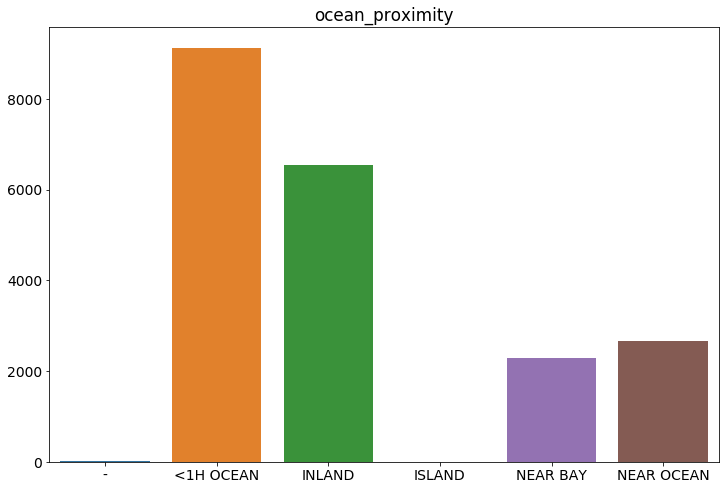

In [78]:
counts = df['ocean_proximity'].value_counts()
plt.figure(figsize=(12,8))
plt.title('ocean_proximity')
sns.barplot(counts.index, counts.values)
plt.show()

In [79]:
# Бинарные признаки
df_bin_features = df.select_dtypes(include='int64')

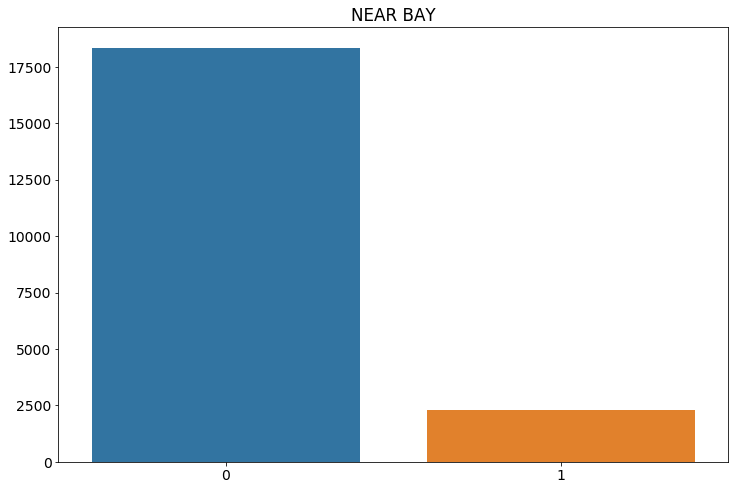

In [80]:
counts = df['NEAR BAY'].value_counts()
plt.figure(figsize=(12,8))
plt.title('NEAR BAY')
sns.barplot(counts.index, counts.values)
plt.show()

In [81]:
# Матрица корреляции.
# Показывает линейную связь. Изменяется от -1 до 1. Чем ближе к 1 тем больше связь
# Полезно посмотреть как ваши признаки зависят друг от друга
# correlation != Causation
# Корреляция - мера только линейной связи. Например corr(x, x**2) может быть близка к 0

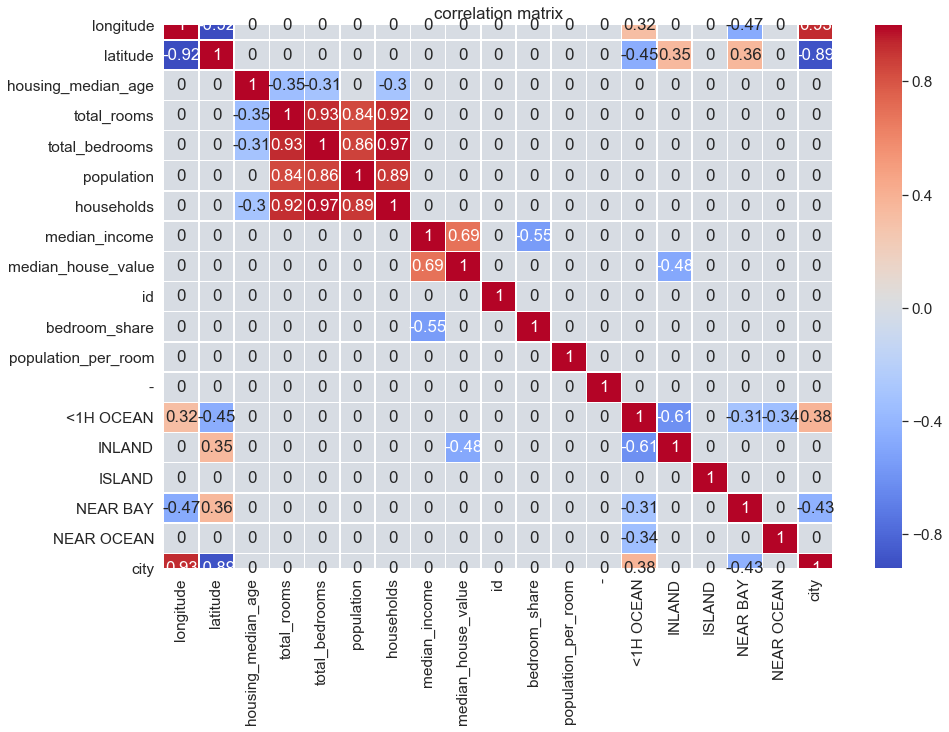

In [82]:
plt.figure(figsize = (15, 10))

sns.set(font_scale = 1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('correlation matrix')
plt.show()


In [83]:
# Анализ зависимости таргета от фичей
# это самая важная часть. Из графиков нужно генерировать идеи для новых фичей

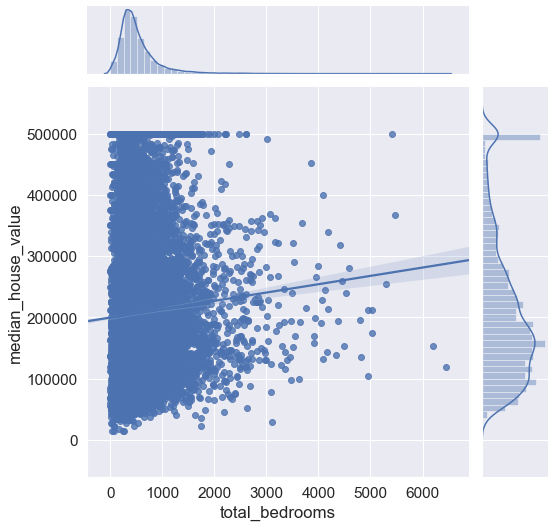

In [84]:
grid = sns.jointplot(df['total_bedrooms'], df['median_house_value'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)
plt.show()

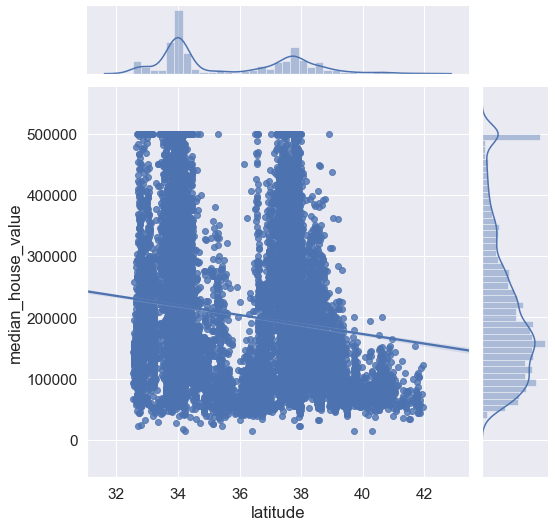

In [85]:
grid = sns.jointplot(df['latitude'], df['median_house_value'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)
plt.show()

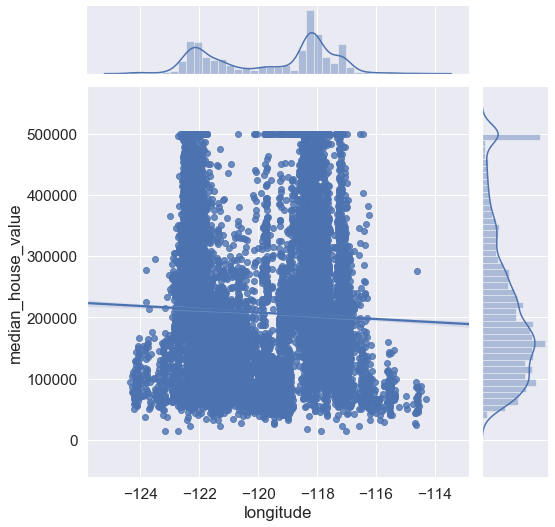

In [86]:
grid = sns.jointplot(df['longitude'], df['median_house_value'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)
plt.show()

In [87]:
df['many_bedrooms'] = (df['total_bedrooms'] > 3000) * 1

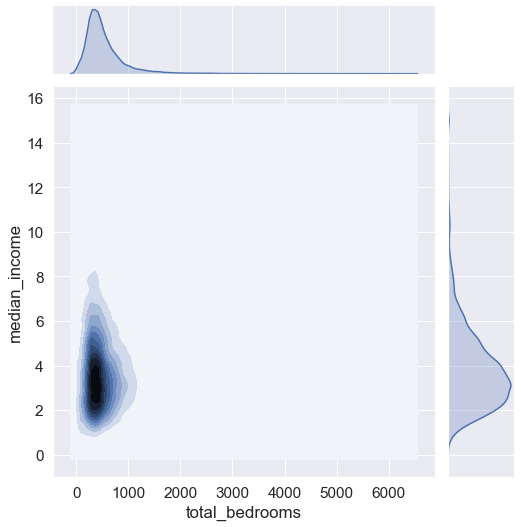

In [88]:
grid = sns.jointplot(df['total_bedrooms'], df['median_income'], kind='kde')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)
plt.show()

In [89]:
# Зависимость таргета от категориальных / бинарных признаков


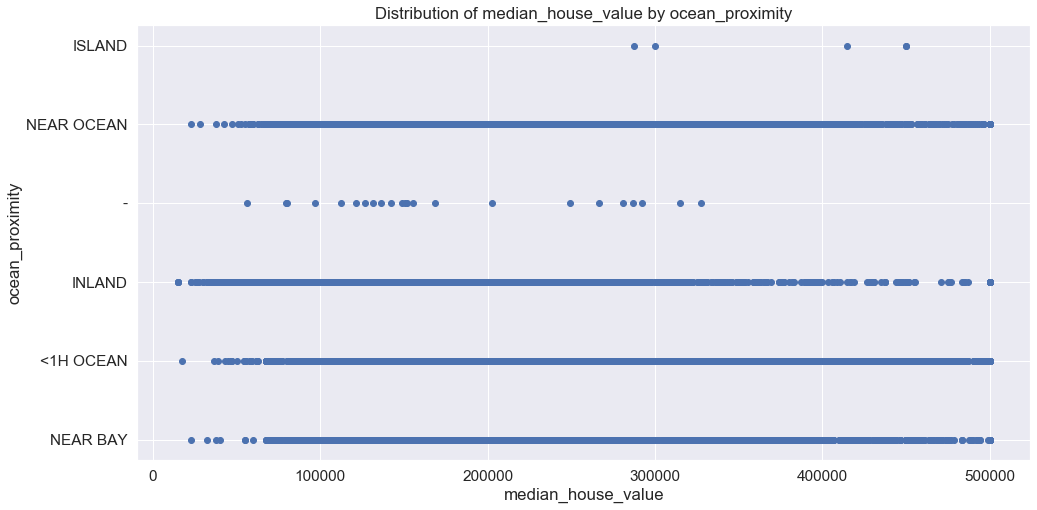

In [90]:
plt.figure(figsize=(16, 8))

plt.scatter(df['median_house_value'], df['ocean_proximity'])

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity')
plt.show()

In [91]:
# не строить scatterplot для категорий

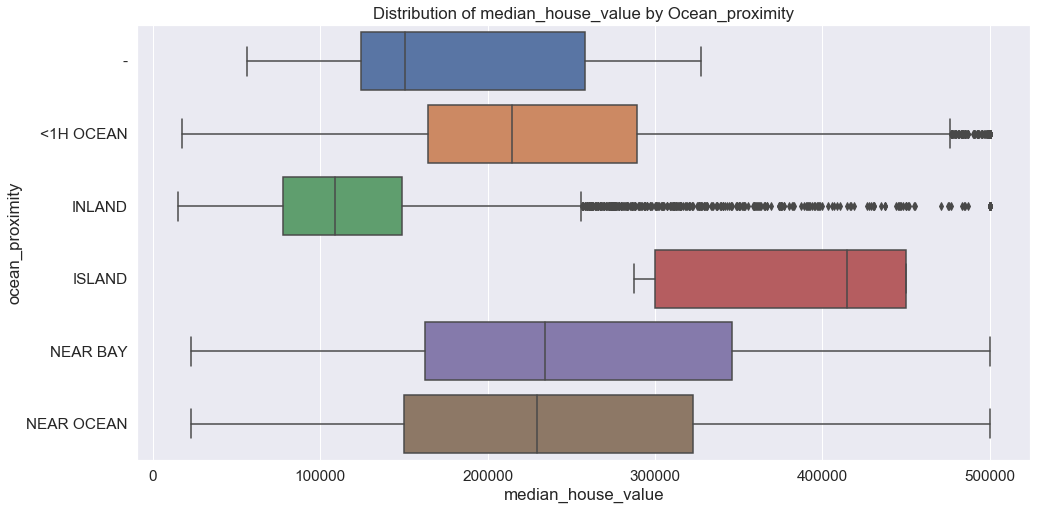

In [92]:
# boxplot
plt.figure(figsize=(16,8))

sns.boxplot(df['median_house_value'], df['ocean_proximity'])

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by Ocean_proximity')
plt.show()

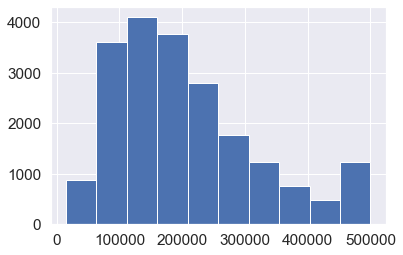

In [93]:
df['median_house_value'].hist()

In [94]:
# чтобы посчитать усыл можно
# среднее +/- 3 стандартных отклюонения (сигма)
# min/max
# median +/- 1.5(q75-q25)
# Интерквартильный размах = q75 - q25

# box plot строиться следующим образом
# box от 25 до 75 квантиля
# Линия посередине box - медиана
# усы

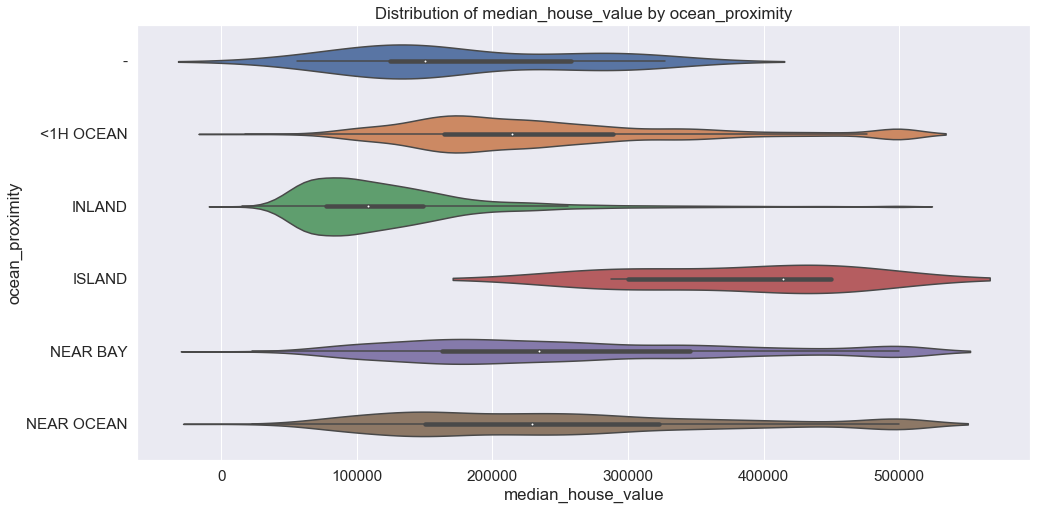

In [95]:
# Violin plot
plt.figure(figsize=(16, 8))

sns.violinplot(df['median_house_value'], df['ocean_proximity'])

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity')
plt.show()

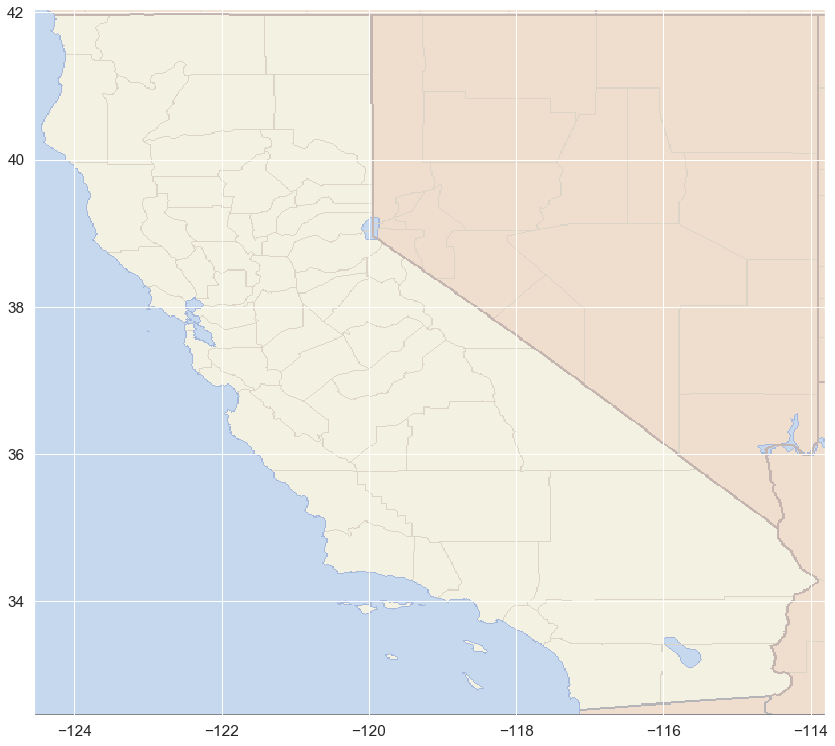

In [97]:
# Гео данные

california_map = img.imread(CALIFORNIA_MAP_PATH)
plt.figure(figsize=(20,13))
plt.imshow(california_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.show()

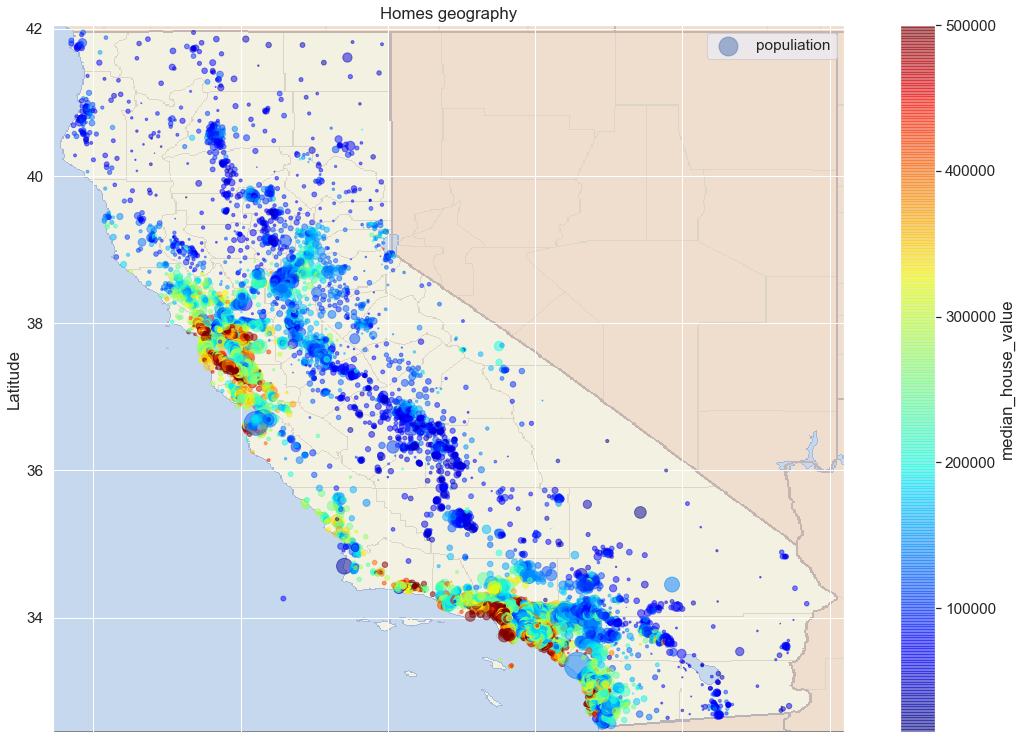

In [99]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5,
       s=df['population'] / 50, label='populiation', c='median_house_value',
       cmap=plt.get_cmap('jet'), figsize=(20,13))

plt.imshow(california_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Homes geography')
plt.legend()
plt.show()

In [102]:
#kepler
!conda install keplergl

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - keplergl

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [103]:
from keplergl import KeplerGl

ModuleNotFoundError: No module named 'keplergl'

In [104]:
map_ = KeplerGl(height=700)
map_.add_data(df, 'Data')
map_.save_to_html(file_name='../data/california.html')

NameError: name 'KeplerGl' is not defined